In [135]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

#Library for saving data
import pickle

#other libraries
import pandas as pd
import numpy as np

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

question: how does HR Analytics help in analyzing attrition

Human resource analytics (HR analytics) is an area in the field of analytics that refers to
applying analytic processes to the human resource department of an organization in the hope
of improving employee performance and therefore getting a better return on investment. HR
analytics does not just deal with gathering data on employee efficiency. Instead, it aims to
provide insight into each process by gathering data and then using it to make relevant
decisions about how to improve these processes



Attrition in human resources refers to the gradual loss of employees overtime

In [136]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(100)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,No,Travel_Rarely,1217,Research & Development,2,4,Technical Degree,1,126,1,Female,60,3,3,Research Director,3,Married,13549,24001,9,Y,No,12,3,1,80,1,16,5,1,4,3,0,3
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,128,1,Female,33,3,2,Sales Executive,3,Married,4999,17519,0,Y,No,21,4,1,80,1,4,2,2,3,2,0,2
97,28,No,Non-Travel,120,Sales,4,3,Medical,1,129,2,Male,43,3,2,Sales Executive,3,Married,4221,8863,1,Y,No,15,3,2,80,0,5,3,4,5,4,0,4
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,4,Male,37,3,4,Sales Executive,3,Single,13872,24409,0,Y,No,13,3,3,80,0,38,1,2,37,10,1,8


There is 35 columns in the dataset

In [137]:
#show all columns in dataframe
pd.set_option('display.max_columns', None)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


Many of the data in the columns seem to have only one unique value

# Checking columns with single unique values

In [138]:
#value counts of some  datas

print("Standardhours value count",df["StandardHours"].value_counts())

print(" ")
print("BusinessTravel",df["BusinessTravel"].value_counts())

print(" ")
print("Department",df["Department"].value_counts())

print(" ")
print("EmployeeCount",df["EmployeeCount"].value_counts())

Standardhours value count 80    1470
Name: StandardHours, dtype: int64
 
BusinessTravel Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
 
Department Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
 
EmployeeCount 1    1470
Name: EmployeeCount, dtype: int64


In [139]:
#Since StandardHours and EmployeeCount one unique value, dropping it
df=df.drop(columns=["StandardHours","EmployeeCount"])

In [140]:
#Employee number is an unnecessary column which we can drop
df=df.drop(columns=['EmployeeNumber'])

In [141]:
cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column         value                            
Attrition      Yes                           237
               No                           1233
BusinessTravel Non-Travel                    150
               Travel_Frequently             277
               Travel_Rarely                1043
Department     Human Resources                63
               Sales                         446
               Research & Development        961
EducationField Human Resources                27
               Other                          82
               Technical Degree              132
               Marketing                     159
               Medical                       464
               Life Sciences                 606
Gender         Female                        588
               Male                          882
JobRole        Human Resources                52
               Research Director              80
               Sales Representative           83
               Manager                       102
               Healthcare Representative     131
               Manufacturing Director        145
               Laboratory Technician         259
               Research Scientist            292
               Sales Executive               326
MaritalStatus  Divorced                      327
               Single                        470
               Married                       673
Over18         Y                            1470
OverTime       Yes                           416
               No                           1054

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [143]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


OBSERVATIONS:

1.The difference between mean and median is large in MonthlyIncome,StockOptionLevel,YearsAtCompany and small in other numerical datas

2.Null values arent seen

In [144]:
#checking nan
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [145]:
#removing duplicate values
df.drop_duplicates(inplace=True)

In [146]:
#finding numerical datas

df.select_dtypes(include=["number"]).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [147]:
num=df[{'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'}]
num

,StockOptionLevel,MonthlyIncome,NumCompaniesWorked,YearsInCurrentRole,JobLevel,YearsAtCompany,JobInvolvement,EnvironmentSatisfaction,Education,PercentSalaryHike,YearsSinceLastPromotion,MonthlyRate,YearsWithCurrManager,TotalWorkingYears,JobSatisfaction,TrainingTimesLastYear,WorkLifeBalance,PerformanceRating,Age,HourlyRate,RelationshipSatisfaction,DailyRate,DistanceFromHome
0,0,5993,8,4,2,6,3,2,2,11,0,19479,5,8,4,0,1,3,41,94,1,1102,1
1,1,5130,1,7,2,10,2,3,1,23,1,24907,7,10,2,3,3,4,49,61,4,279,8
2,0,2090,6,0,1,0,2,4,2,15,0,2396,0,7,3,3,3,3,37,92,2,1373,2
3,0,2909,1,7,1,8,3,4,4,11,3,23159,0,8,3,3,3,3,33,56,3,1392,3
4,1,3468,9,2,1,2,3,1,1,12,2,16632,2,6,2,3,3,3,27,40,4,591,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,2571,4,2,2,5,4,3,2,17,0,12290,3,17,4,3,3,3,36,41,3,884,23
1466,1,9991,4,7,3,7,2,4,1,15,1,21457,7,9,1,5,3,3,39,42,1,613,6
1467,1,6142,1,2,2,6,4,2,3,20,0,5174,3,6,2,0,3,4,27,87,2,155,4
1468,0,5390,2,6,2,9,2,4,3,14,0,13243,8,17,2,3,2,3,49,63,4,1023,2


In [148]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   StockOptionLevel          1470 non-null   int64
 1   MonthlyIncome             1470 non-null   int64
 2   NumCompaniesWorked        1470 non-null   int64
 3   YearsInCurrentRole        1470 non-null   int64
 4   JobLevel                  1470 non-null   int64
 5   YearsAtCompany            1470 non-null   int64
 6   JobInvolvement            1470 non-null   int64
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Education                 1470 non-null   int64
 9   PercentSalaryHike         1470 non-null   int64
 10  YearsSinceLastPromotion   1470 non-null   int64
 11  MonthlyRate               1470 non-null   int64
 12  YearsWithCurrManager      1470 non-null   int64
 13  TotalWorkingYears         1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

All are integer datatypes

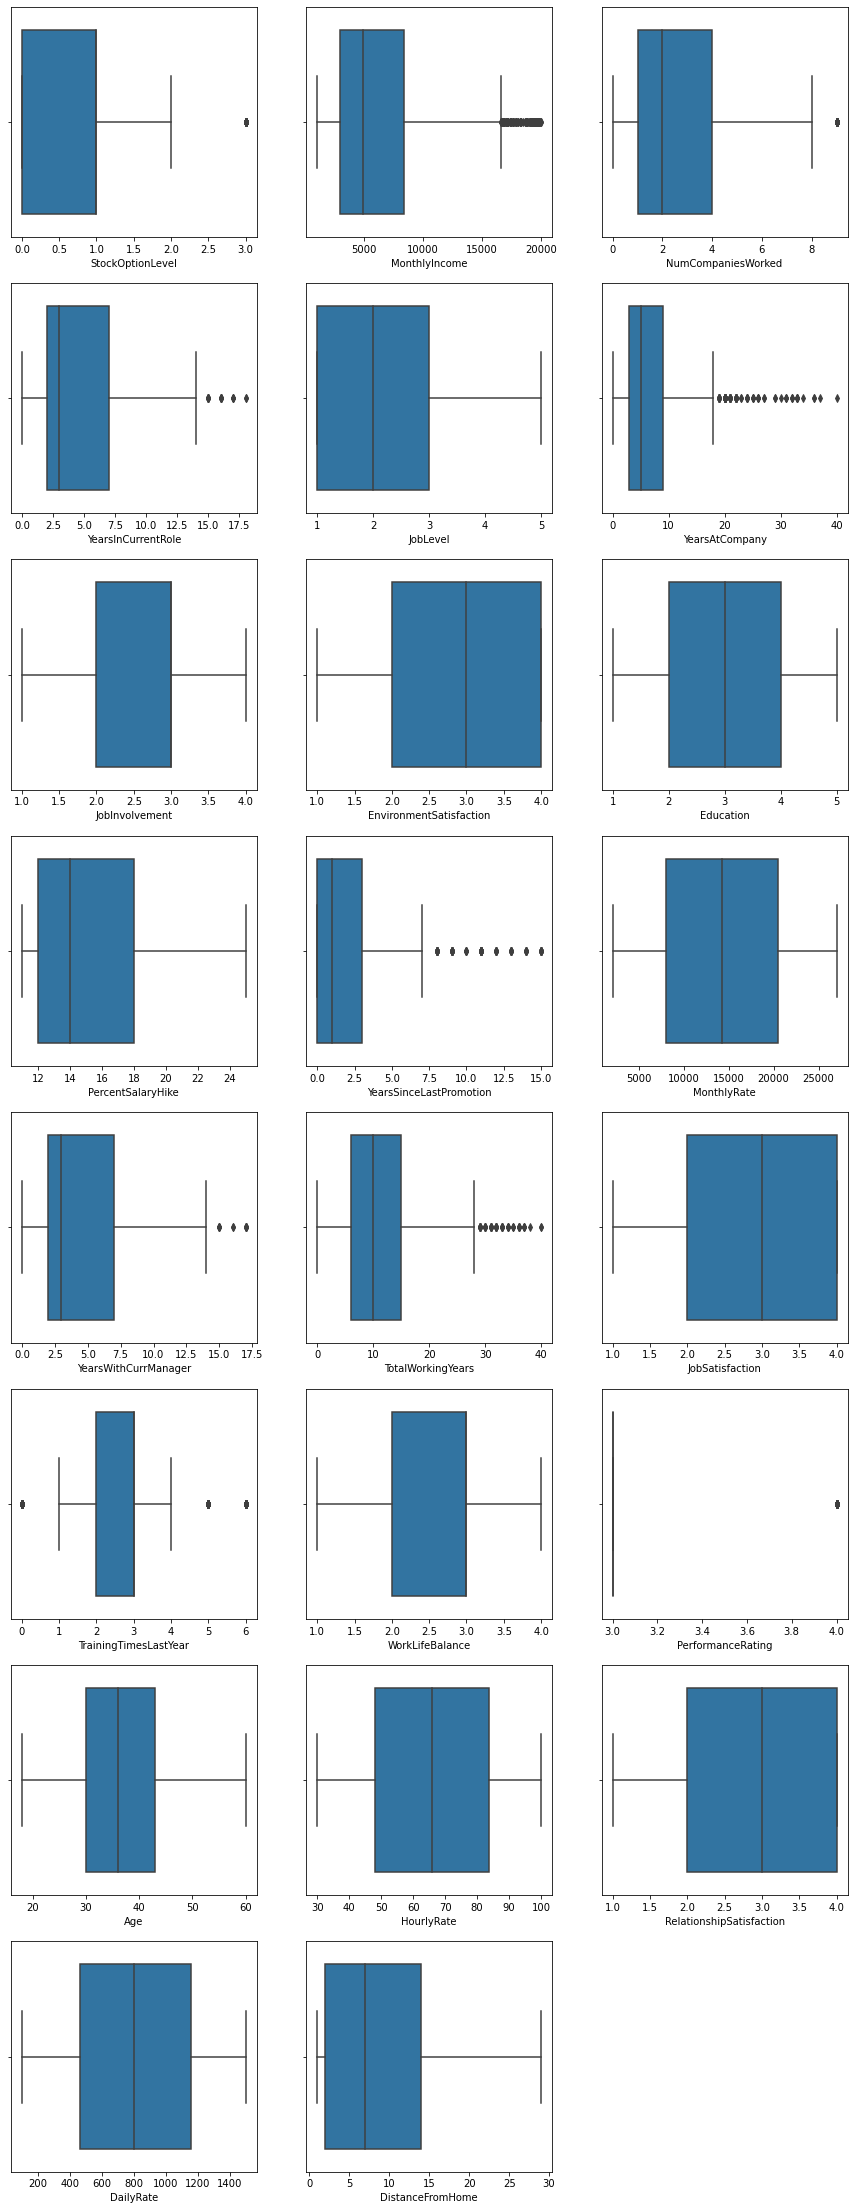

In [149]:
#visualising the relationship
plt.figure(figsize=(15,50))
graph=1

for column in num:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(num[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
    
plt.show()

Have explained the relationship between continous features and label after a few lines of code

# finding categorical datas

In [150]:
df.select_dtypes(exclude=["number"]).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [151]:
cat=df[{'Attrition', 'EducationField', 'Gender','BusinessTravel','Department',
       'JobRole', 'MaritalStatus', 'OverTime'}]
cat

,BusinessTravel,EducationField,Department,OverTime,MaritalStatus,JobRole,Attrition,Gender
0,Travel_Rarely,Life Sciences,Sales,Yes,Single,Sales Executive,Yes,Female
1,Travel_Frequently,Life Sciences,Research & Development,No,Married,Research Scientist,No,Male
2,Travel_Rarely,Other,Research & Development,Yes,Single,Laboratory Technician,Yes,Male
3,Travel_Frequently,Life Sciences,Research & Development,Yes,Married,Research Scientist,No,Female
4,Travel_Rarely,Medical,Research & Development,No,Married,Laboratory Technician,No,Male
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Medical,Research & Development,No,Married,Laboratory Technician,No,Male
1466,Travel_Rarely,Medical,Research & Development,No,Married,Healthcare Representative,No,Male
1467,Travel_Rarely,Life Sciences,Research & Development,Yes,Married,Manufacturing Director,No,Male
1468,Travel_Frequently,Medical,Sales,No,Married,Sales Executive,No,Male


In [152]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BusinessTravel  1470 non-null   object
 1   EducationField  1470 non-null   object
 2   Department      1470 non-null   object
 3   OverTime        1470 non-null   object
 4   MaritalStatus   1470 non-null   object
 5   JobRole         1470 non-null   object
 6   Attrition       1470 non-null   object
 7   Gender          1470 non-null   object
dtypes: object(8)
memory usage: 103.4+ KB


All are categorical data

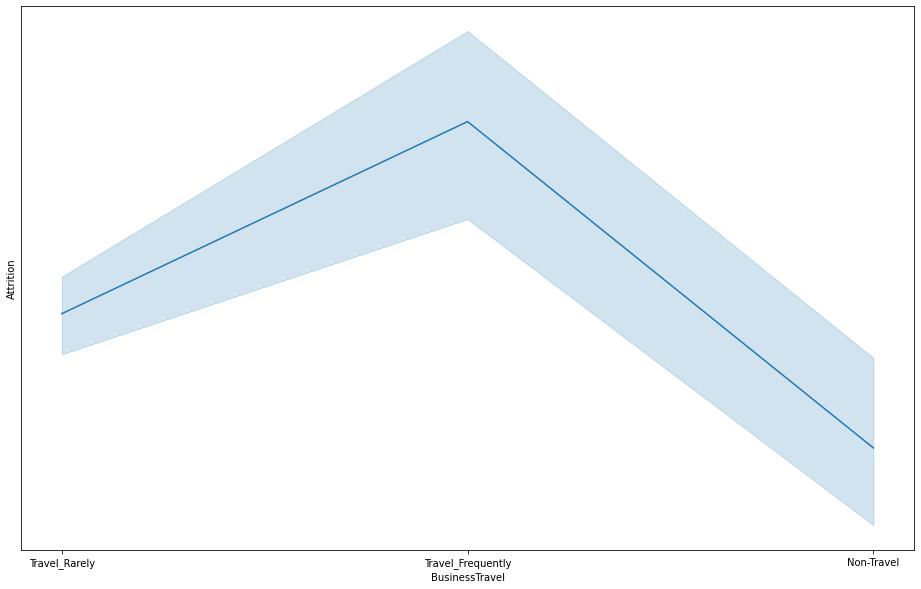

In [153]:
plt.figure(figsize=(16,10))
sns.lineplot(x="BusinessTravel",y="Attrition",data=df)
plt.show()


Atrrition is highest for those who travel frequently for buisness

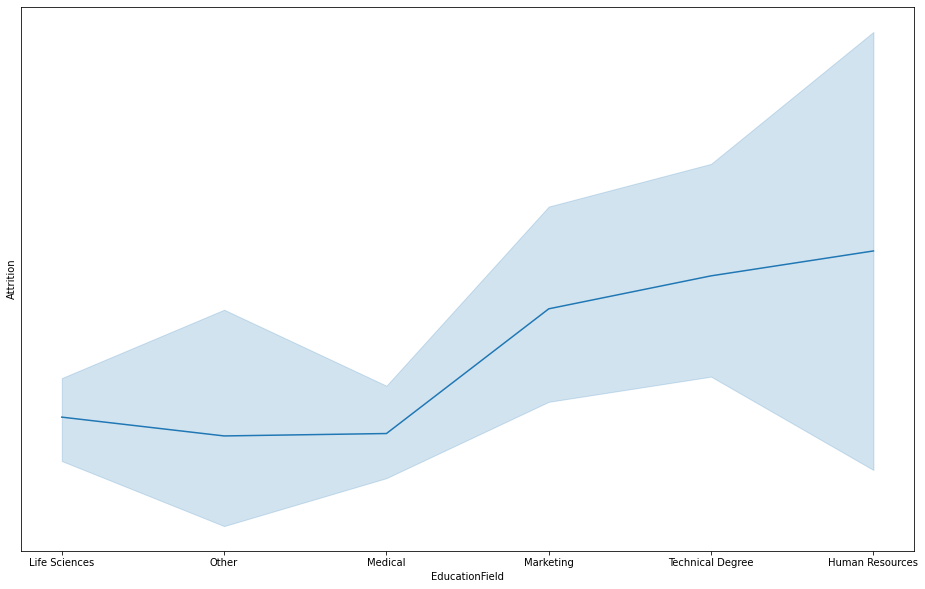

In [154]:
plt.figure(figsize=(16,10))
sns.lineplot(x="EducationField",y="Attrition",data=df)
plt.show()


Attrition is highest for human resource related education background employee

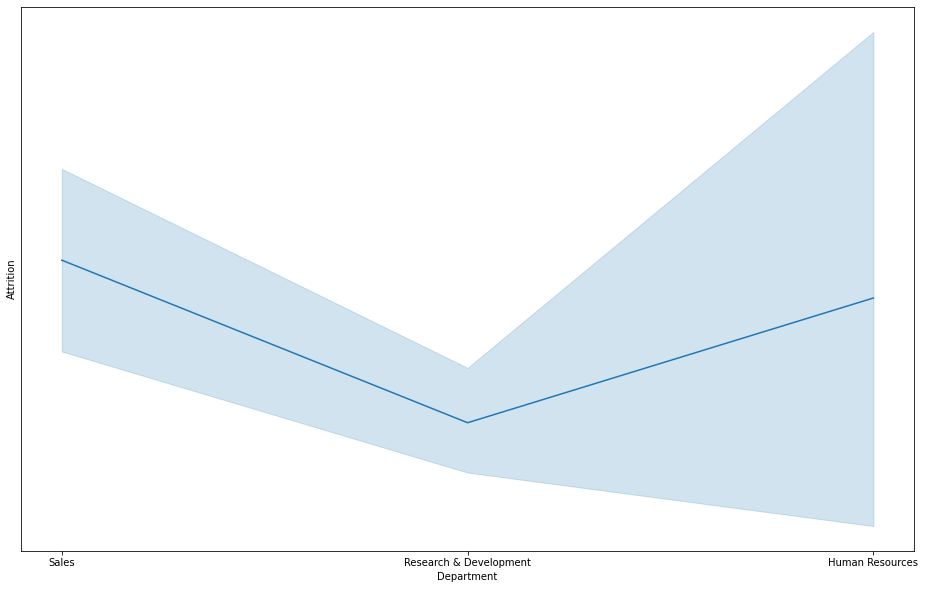

In [155]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Department",y="Attrition",data=df)
plt.show()

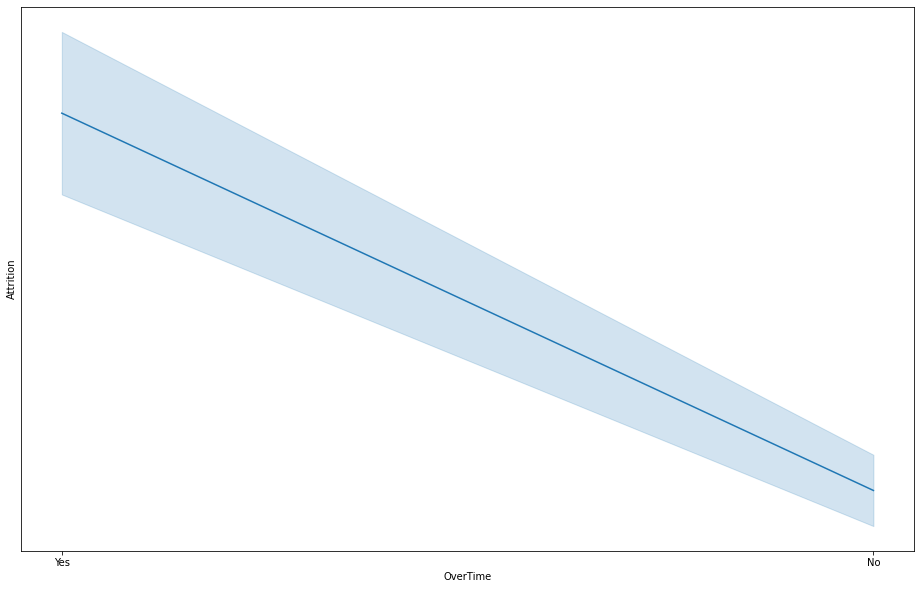

In [156]:
plt.figure(figsize=(16,10))
sns.lineplot(x="OverTime",y="Attrition",data=df)
plt.show()

attrition is highest for those employees who worked overtime

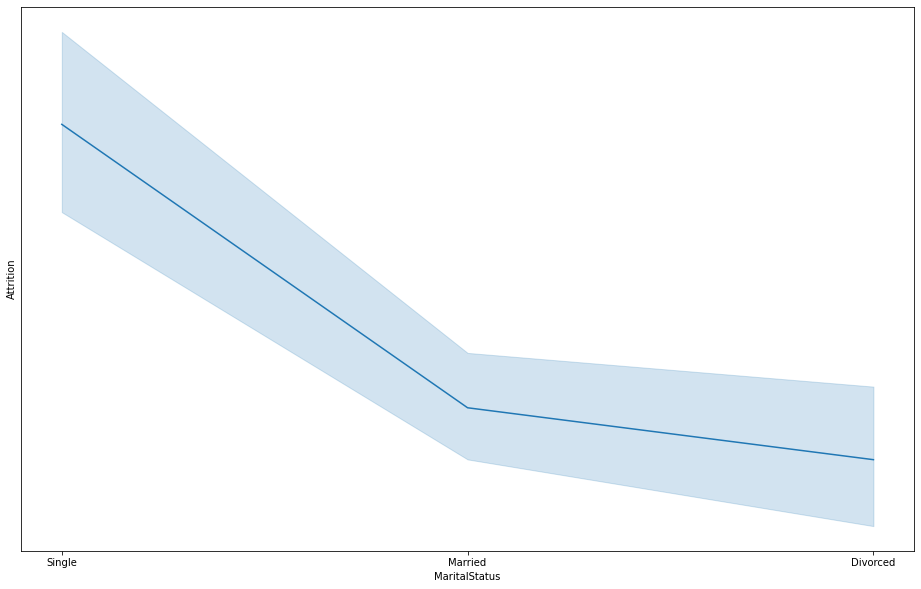

In [157]:
plt.figure(figsize=(16,10))
sns.lineplot(x="MaritalStatus",y="Attrition",data=df)
plt.show()

Attrition is highest among single, then married men/women and then only divorced person

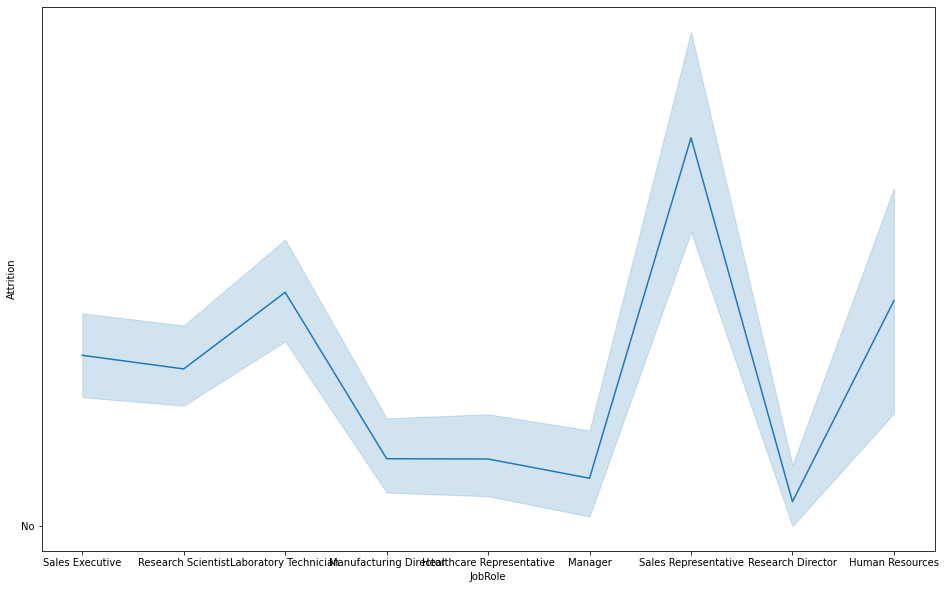

In [158]:
plt.figure(figsize=(16,10))
sns.lineplot(x="JobRole",y="Attrition",data=df)
plt.show()

Attrition was highest among a person who was in a sales representative

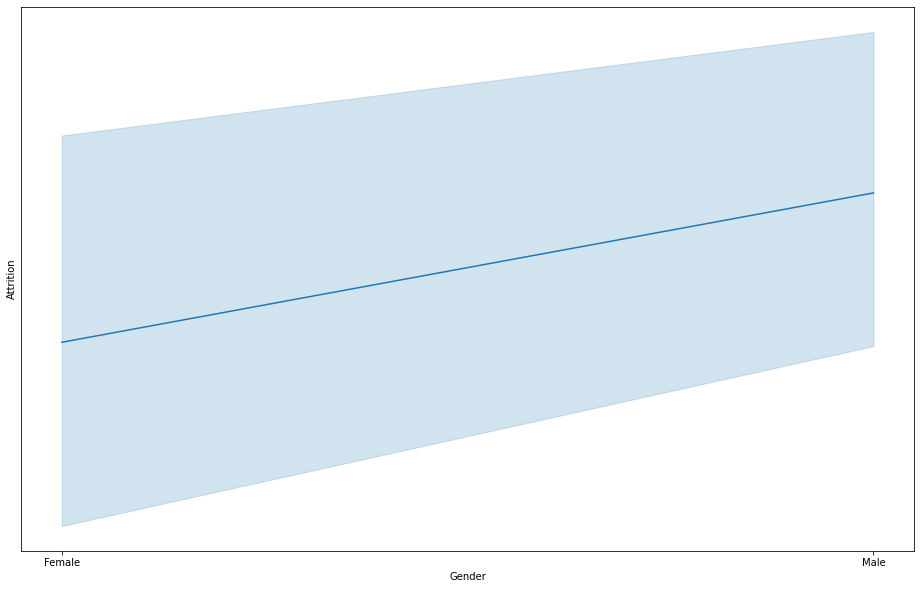

In [159]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Gender",y="Attrition",data=df)
plt.show()

Attrition was higher among male that female

In [160]:
x=df.drop(["Attrition"],axis=1)
y=df["Attrition"]

# EDA on continous data

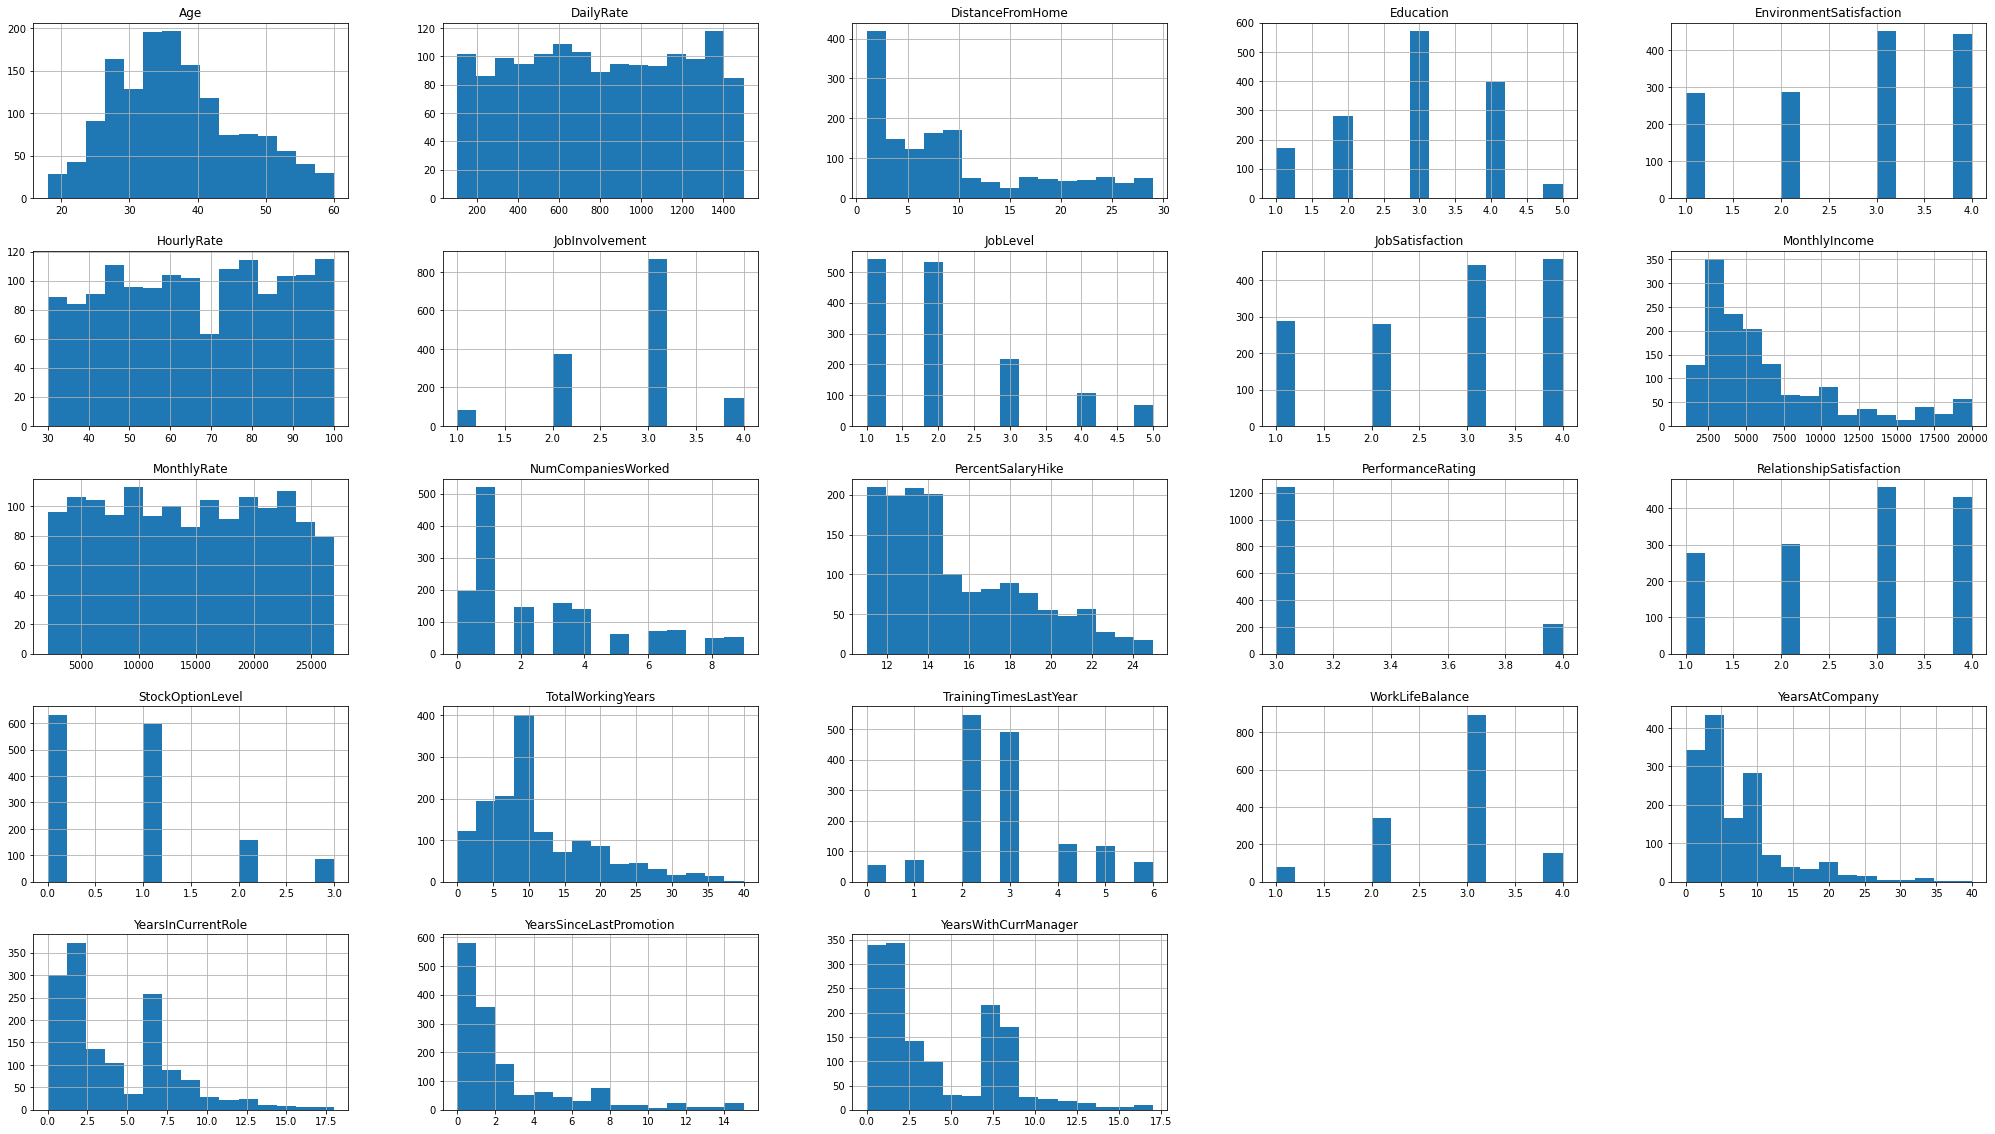

In [161]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()


In [162]:
#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(num)

In [163]:
# reducing skewness
num.skew()

StockOptionLevel            0.968980
MonthlyIncome               1.369817
NumCompaniesWorked          1.026471
YearsInCurrentRole          0.917363
JobLevel                    1.025401
YearsAtCompany              1.764529
JobInvolvement             -0.498419
EnvironmentSatisfaction    -0.321654
Education                  -0.289681
PercentSalaryHike           0.821128
YearsSinceLastPromotion     1.984290
MonthlyRate                 0.018578
YearsWithCurrManager        0.833451
TotalWorkingYears           1.117172
JobSatisfaction            -0.329672
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
PerformanceRating           1.921883
Age                         0.413286
HourlyRate                 -0.032311
RelationshipSatisfaction   -0.302828
DailyRate                  -0.003519
DistanceFromHome            0.958118
dtype: float64

skewness is less and outliers are also less. 

In [164]:
#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df_new=df[(z<3).all(axis=1)]


In [165]:
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,0,17,3,2,9,6,0,8


In [166]:
print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

columns before applying zscore:  1470
columns after applying zscore:  1387


In [167]:
df=df_new
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,0,17,3,2,9,6,0,8


very less skewness so not applying power transform

# Dealing with categorical data

In [168]:
#label encoding on Attrition(label)
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)

In [169]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,605,2,0,1,1,1,0,64,2,1,7,3,2,805,946,8,0,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,108,1,7,0,1,2,1,31,1,1,6,1,1,678,1259,1,0,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,783,1,1,1,4,3,1,62,1,0,2,2,2,62,15,6,0,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,798,1,2,3,1,3,0,26,2,0,6,2,1,312,1166,1,0,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,298,1,1,0,3,0,1,10,2,0,2,1,1,397,806,9,0,0,1,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,476,1,22,1,3,2,1,11,3,1,2,3,1,209,568,4,0,0,6,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,312,1,5,0,3,3,1,12,1,2,0,0,1,1060,1065,4,0,0,4,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,57,3,1,4,1,1,817,158,1,0,1,9,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,561,2,1,2,3,3,1,33,1,1,7,1,1,726,608,2,0,0,3,0,3,0,17,3,1,9,6,0,8


# Relationship between continous features and label

continous features : 

'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'

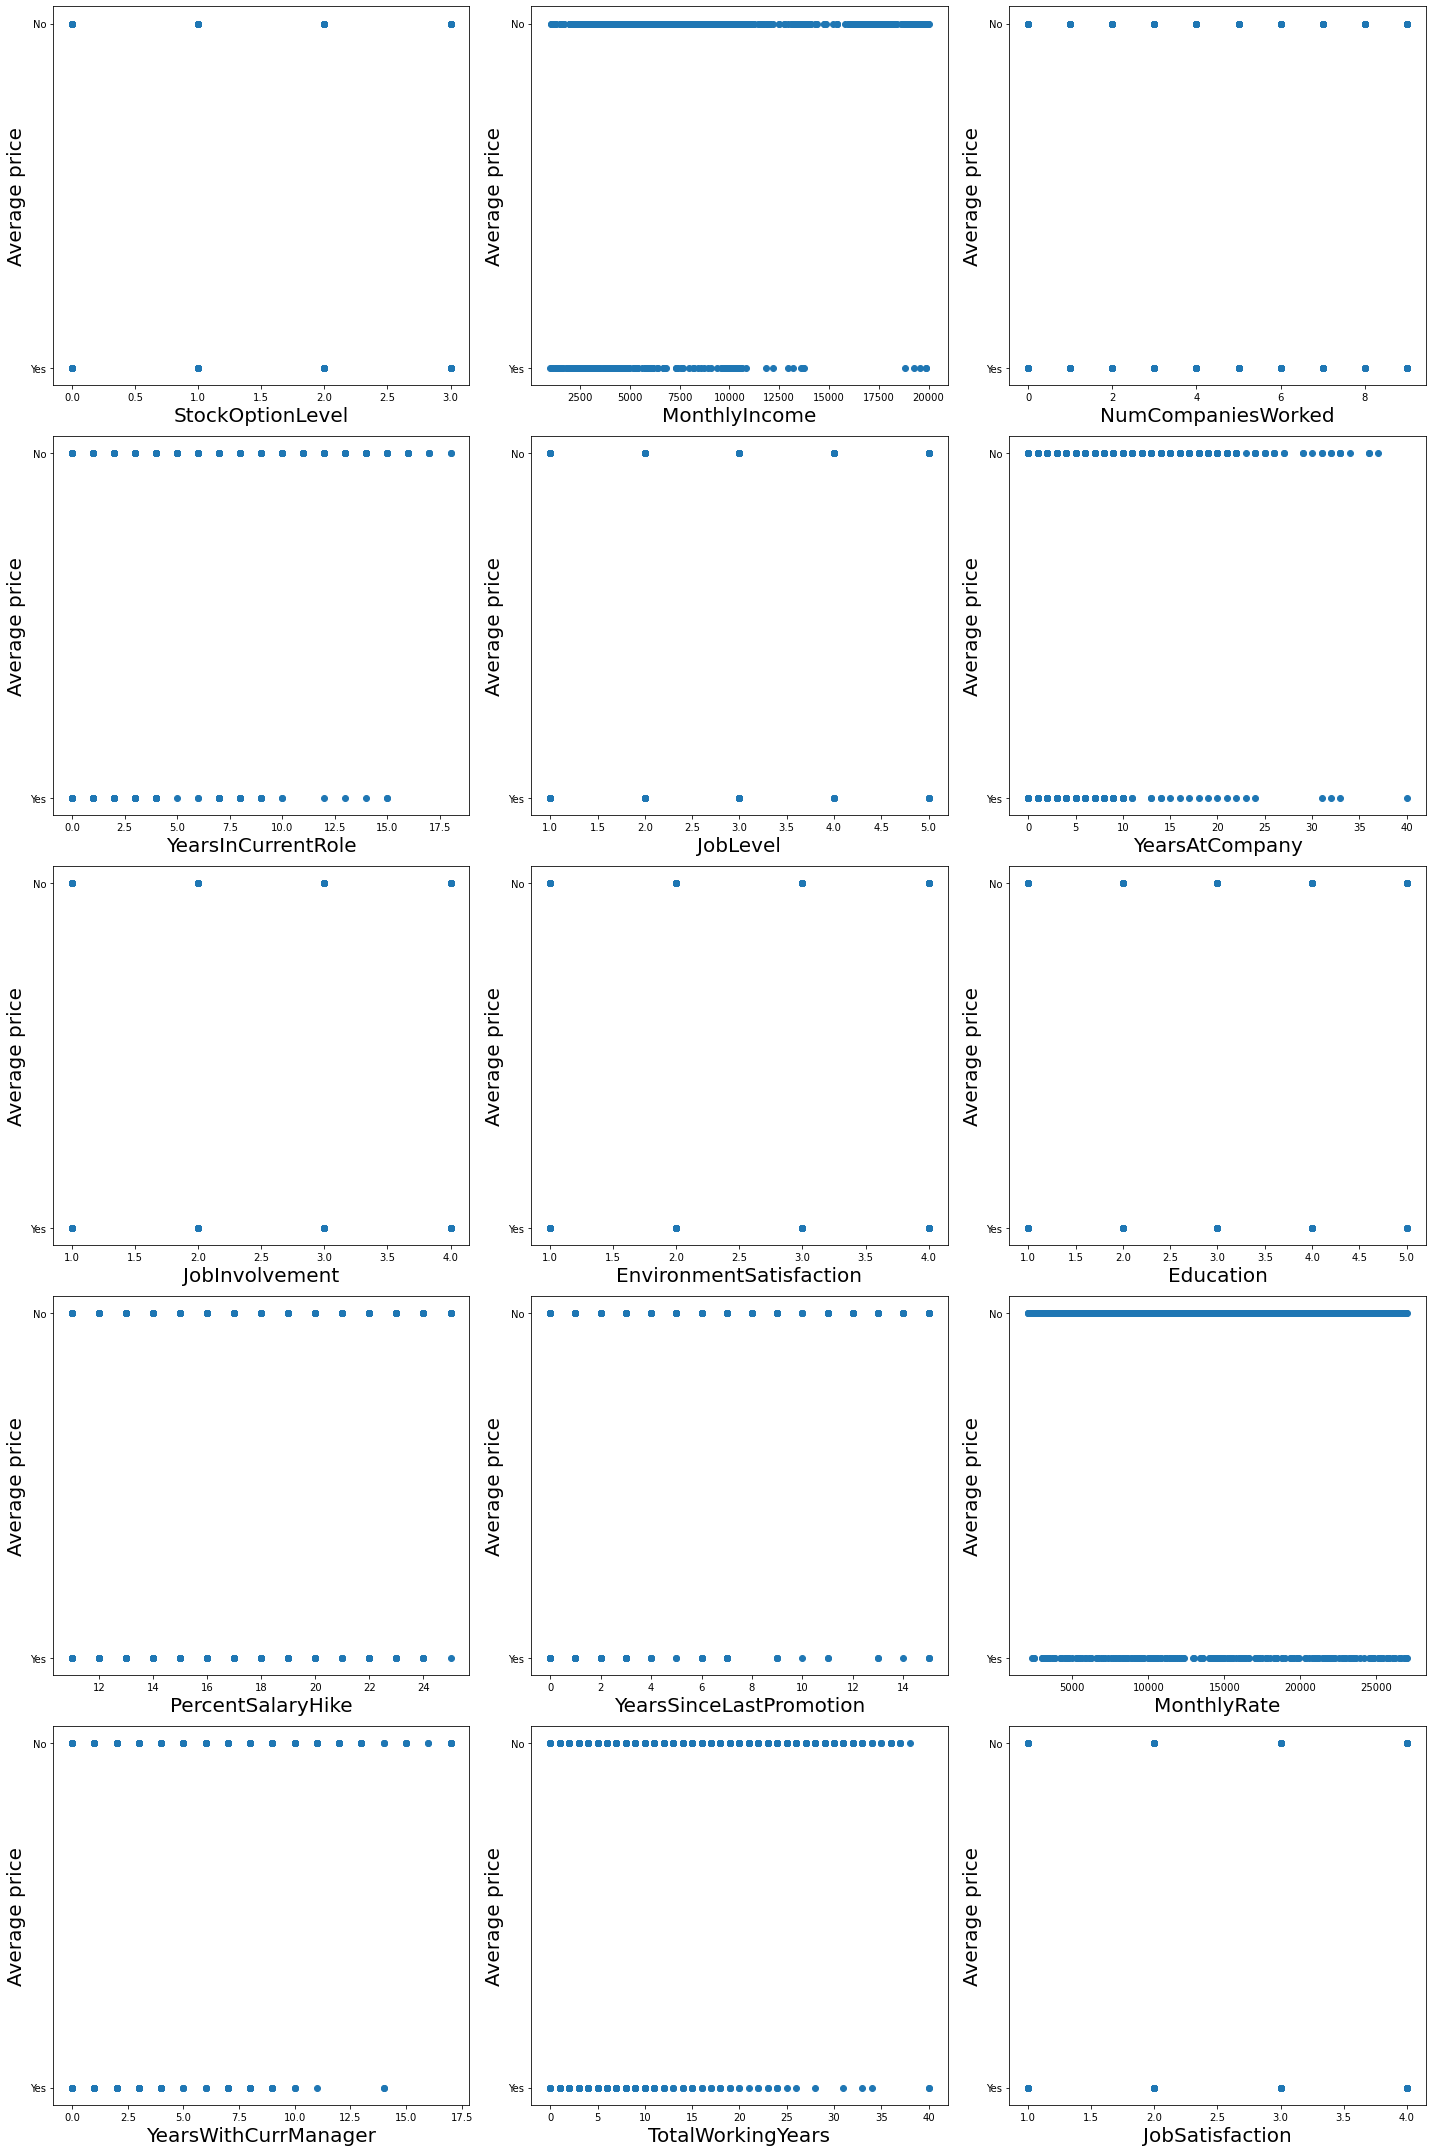

In [173]:
#visualising the relationship- scatter plot 
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(num[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Average price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Observation:

1.Daily rates have no much effect on attrition

2.also distance from hom has less impact on attrtion, however sometimes if its more than 700 distance then attrtion becomes yes

3.there is less impact of Job satisfaction,PercentSalaryHike,Job involvement, environmental satisfaction,education.stockoptionlevel and monthly income

4.As monethly income increased that 12,000 the attrition decreased

5.as years in current role went above 15, then attrition increased

6.when years with current manager increased beyond 11years, then attrition also increased



# checking for class imbalance

In [174]:
print("labels count: \n ",df["Attrition"].value_counts())

labels count: 
  0    1158
1     229
Name: Attrition, dtype: int64


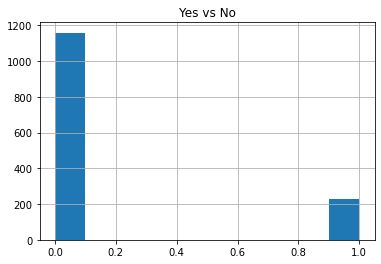

In [175]:
df["Attrition"].hist(grid=True)
plt.title("Yes vs No")
plt.show()

Our class is highly imbalanced, hence needs to be balanced

# balancing class

In [176]:
# class count
class_count_0, class_count_1 = df['Attrition'].value_counts()

In [177]:
#Separate class
class_0 = df[df['Attrition'] == 0]
class_1 = df[df['Attrition'] == 1]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1158, 32)
class 1: (229, 32)


total class of 1 and0: 1    229
0    229
Name: Attrition, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

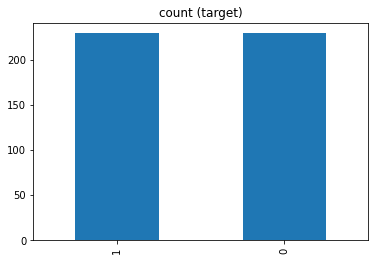

In [178]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['Attrition'].value_counts())# plot the count after under-sampeling
test_under['Attrition'].value_counts().plot(kind='bar', title='count (target)')

hence our classes are now balanced

# Checking for Multicollinearity

Checking multicollineairty with vif and heatmap

In [179]:
#vif
x=df.drop(columns=["Attrition"])
y=df['Attrition']

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=x.columns
vif

,quality,feature
0,1.849594,Age
1,1.013633,BusinessTravel
2,1.028746,DailyRate
3,2.091601,Department
4,1.015281,DistanceFromHome
5,1.065251,Education
6,1.021662,EducationField
7,1.024014,EnvironmentSatisfaction
8,1.023735,Gender
9,1.021247,HourlyRate


All are less than 5 hence less multicollinearity

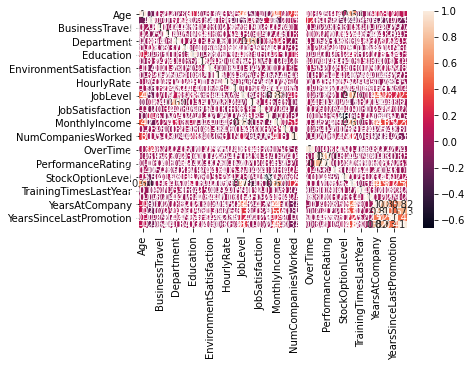

In [180]:
data_corr=df.corr()
sns.heatmap(data_corr, annot = True)
plt.show()

Multicollinearity is not seen

# PCA

In [181]:
#standardising the data for PCA
x=df.drop(columns=["Attrition"])
y=df['Attrition']

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)

#PCA
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100

var_cumu

array([ 14.00051562,  21.0680581 ,  27.11536518,  32.88057055,
        38.28932338,  42.14410814,  45.97334142,  49.70841644,
        53.3527216 ,  56.94062843,  60.41874101,  63.82924961,
        67.15781324,  70.37449273,  73.55486507,  76.66994509,
        79.67443949,  82.62983076,  85.49104814,  88.29123098,
        90.78900617,  92.76254633,  94.70319701,  95.79374421,
        96.81040644,  97.67814449,  98.47442298,  99.19126858,
        99.66841444, 100.        , 100.        ])

In [182]:
# PCs explaines 99% of the variance?
k=np.argmax(var_cumu>95)
print("Number of components explaining 99% variance: ",k)

Number of components explaining 99% variance:  23


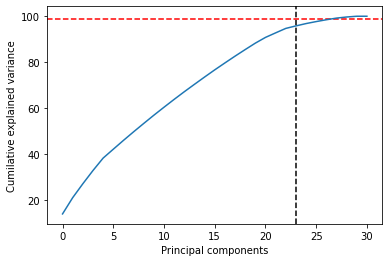

In [183]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=99,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [184]:
# Creating final dataset with 30 columns

FinalPCA=PCA(n_components=6)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5
0,0.147607,0.822121,-2.185954,-1.531650,0.247391,-1.636812
1,1.085704,-0.933408,2.605334,-1.584164,0.102045,0.615431
2,-2.793785,1.187959,-0.268330,-0.042438,-1.368304,1.660033
3,-0.571469,-0.821426,-1.086602,0.513003,-0.453328,0.560009
4,-1.813093,0.814653,-0.101532,1.222680,-1.037322,0.234077
...,...,...,...,...,...,...
1382,-0.561582,0.770991,0.842047,0.779258,-0.367189,-0.168456
1383,1.452911,0.153154,0.398534,0.928292,-1.115551,3.031408
1384,-0.892689,-0.035344,2.306270,-1.033120,0.476442,-1.882023
1385,1.562175,-0.293887,-1.373191,-0.661033,0.320823,0.360086


In [185]:
df=FinalData2

In [186]:
#analysing data
df.describe()

,0,1,2,3,4,5
count,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03
mean,-1.312737e-17,-4.226372e-17,1.088611e-17,7.772362e-17,1.136638e-16,-1.233892e-16
std,2.050167e+00,1.456542e+00,1.345149e+00,1.315302e+00,1.273876e+00,1.070343e+00
min,-3.934407e+00,-3.816509e+00,-2.568694e+00,-3.970002e+00,-3.569014e+00,-3.091291e+00
25%,-1.549692e+00,-1.070895e+00,-9.314975e-01,-8.329121e-01,-9.643626e-01,-7.134111e-01
50%,-2.245450e-01,-1.855099e-01,-2.103319e-01,1.198377e-02,4.942758e-02,3.452092e-03
75%,1.466479e+00,9.487401e-01,6.133383e-01,9.349340e-01,8.805425e-01,7.009105e-01
max,6.257070e+00,5.289483e+00,4.409285e+00,4.292640e+00,3.643255e+00,4.379991e+00


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1387 non-null   float64
 1   1       1387 non-null   float64
 2   2       1387 non-null   float64
 3   3       1387 non-null   float64
 4   4       1387 non-null   float64
 5   5       1387 non-null   float64
dtypes: float64(6)
memory usage: 65.1 KB


# Splitting data 

In [188]:
#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

#splitting data
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [189]:
y_train.head()

1009    0
1395    1
1010    0
504     1
1017    0
Name: Attrition, dtype: int32

# Finding best random state

In [190]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.9164265129682997 on Random State 109


In [191]:
 x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=109)

# Modelling

In [192]:
#modelling

from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9164265129682997
[[295   4]
 [ 25  23]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       299
           1       0.85      0.48      0.61        48

    accuracy                           0.92       347
   macro avg       0.89      0.73      0.78       347
weighted avg       0.91      0.92      0.91       347



In [193]:
#modelling
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8040345821325648
[[258  41]
 [ 27  21]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       299
           1       0.34      0.44      0.38        48

    accuracy                           0.80       347
   macro avg       0.62      0.65      0.63       347
weighted avg       0.83      0.80      0.81       347



In [194]:
#modelling
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8876080691642652
[[299   0]
 [ 39   9]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       299
           1       1.00      0.19      0.32        48

    accuracy                           0.89       347
   macro avg       0.94      0.59      0.63       347
weighted avg       0.90      0.89      0.85       347



In [195]:
#modelling
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)

print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8760806916426513
[[295   4]
 [ 39   9]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       299
           1       0.69      0.19      0.30        48

    accuracy                           0.88       347
   macro avg       0.79      0.59      0.61       347
weighted avg       0.86      0.88      0.84       347



In [196]:
#Finding overfitting
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of Logistic Regression model : 0.8363452198529984
Cross validation score of Decision Tree model : 0.7901721943744644
Cross validation score of Random Forest model : 0.8550840194270576
Cross validation score of SVC model : 0.8348959821312626


Difference is least in DecisionTreeClassifier

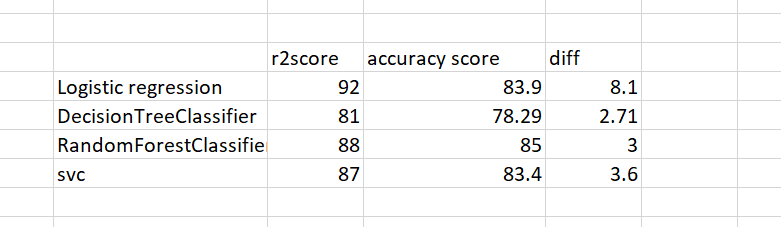

But since there is a class imbalance problem, which even when fixed didnt give a good score using ROC AUC score would be better

# ROC AUC curve

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [198]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()

In [199]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [200]:
print(lr.score(x_test,y_test))
print(dt.score(x_test,y_test))
print(rf.score(x_test,y_test))
print(kn.score(x_test,y_test))

0.9164265129682997
0.8155619596541787
0.8847262247838616
0.8703170028818443


In [201]:
#RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.6008221850613155

In [202]:
#LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.732894370122631

In [203]:
#KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.5574832775919732

In [204]:
#DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

0.6656215161649944

the AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier.

The AUC score shows that Logistic regression is the best classifier among this

# Reason for going for ROC_AUC is because

1.accuracy score is calculated on the predicted classes while we calculate ROC AUC on predicted scores.

2.accuracy looks at fractions of correctly assigned positive and negative classes and since our class is highly imbalanced we get a really high accuracy score by simply predicting that all observations belong to the majority class.



# Hyperparameter tuning

In [205]:
#Logistic Regression
paramters={'penalty':['l1', 'l2','elasticnet','none'],
           'dual':[True,False],
           'tol':[0.21,0.50,0.75,1,1.25,1.5],
           'C':[2,3,4,5,6,7,8,9],
           'intercept_scaling':[1.2,2.1,3.1,20.2],
}

In [206]:
from sklearn.linear_model import LogisticRegression
GCV=GridSearchCV(LogisticRegression(),paramters,cv=5)

In [207]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [2, 3, 4, 5, 6, 7, 8, 9], 'dual': [True, False],
                         'intercept_scaling': [1.2, 2.1, 3.1, 20.2],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'tol': [0.21, 0.5, 0.75, 1, 1.25, 1.5]})

In [208]:
GCV.best_params_

{'C': 2, 'dual': False, 'intercept_scaling': 1.2, 'penalty': 'l2', 'tol': 1.25}

In [209]:
mod=LogisticRegression(C=2,dual=False,intercept_scaling=1.2,penalty='l2',tol=0.21)

In [210]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

91.93083573487031


Accuracy obtained is 91.9 %

In [211]:
regression=LogisticRegression()
regression.fit(x_train,y_train)

LogisticRegression()

# Saving of model

In [212]:
#saving LogisticRegression model
LogisticRegression_tree_model=LogisticRegression()
LogisticRegression_tree_model.fit(x_train,y_train)

filename='finalized_model.pickle'
pickle.dump(LogisticRegression_tree_model,open(filename,'wb'))

In [213]:
y_pred=regression.predict(x_test)

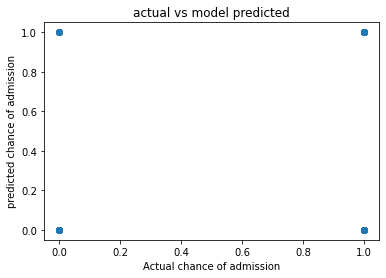

In [214]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

# Accuracy and ROC AUC score of our model

In [215]:
scr=cross_val_score(regression,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

Cross validation score of Logistic Regression model : 0.8363452198529984


In [216]:
regression.fit(x_train,y_train)
pred=regression.predict(x_test)
print("accuracy score of the Logistic Regression model is",accuracy_score(y_test,pred)*100)

accuracy score of the Logistic Regression model is 91.64265129682997


In [217]:
regression.fit(x_train,y_train)
print("ROC AUC Score of the logistic regression model is",roc_auc_score(y_test,regression.predict(x_test)))

ROC AUC Score of the logistic regression model is 0.732894370122631


# Regularisation

In [218]:
lasscv=LassoCV(alphas=None, max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

#best alpha parameter
alpha=lasscv.alpha_

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

lasso_reg.score(x_test,y_test)

0.2739944488926309